https://www.kaggle.com/dongjinseo/eda-to-prediction-dietanic  
위의 link의 kernel을 바탕으로 분석과정을 구성했습니다.

https://medium.com/i-like-big-data-and-i-cannot-lie/how-i-scored-in-the-top-9-of-kaggles-titanic-machine-learning-challenge-243b5f45c8e9
* 이름에서 정보 추출 후 age 결측치 처리
* feature engineering(family size and embarked)
* Grid search 이용하여 Random forest parameter tune

fare 결측치 그냥 pcalss 로 하고 Embarked 최빈값 넣어줄것 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test (1).csv")

#rbind `
df_all = df_train.append(df_test, ignore_index=True)

C:\ProgramData\Miniconda3\envs\my_project\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
# shape & head ,data type & describe
print(df_all.shape)
display(pd.concat([df_all.head(),pd.DataFrame(df_all.dtypes.values, index = df_all.columns).transpose()], axis = 0, ignore_index= True))
display(df_all.describe())

(1309, 12)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,NaN,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26,NaN,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35,C123,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35,NaN,S,8.05,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,float64,object,object,float64,object,int64,int64,int64,object,int64,float64,object


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [5]:
#check Nan and 
display(pd.DataFrame({"count" : df_all.loc[:,df_all.isna().any()].isnull().sum(axis = 0),"%" : round(df_all.loc[:,df_all.isna().any()].isnull().sum(axis = 0)/len(df_all),2)}).T)
#Survived 는 Test셋에서 생긴거니 제외하면
# Age, Fare, Cabin, Embarked 결측치 생긴것 확인 할 수 있다.

#Embarked & Fare 결측치 확인
#pd.isnull(df).any(axis=1)
#df_all[pd.isnull(df_all.Fare) | pd.isnull(df_all.Embarked)]

,Age,Cabin,Embarked,Fare,Survived
%,0.2,0.77,0.0,0.0,0.32
count,263.0,1014.00,2.0,1.0,418.00


## Visualization

Survived(생존여부) 와 다른 feature간의 관계를 살펴보겠다.

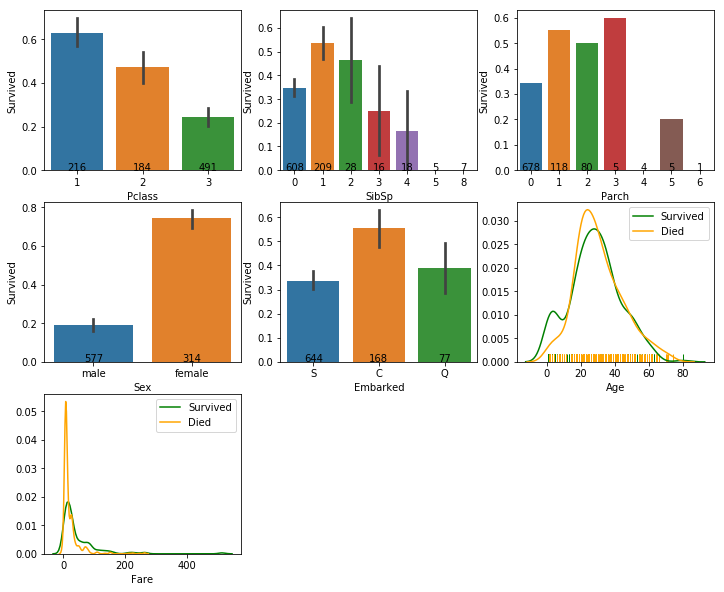

In [6]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[12,10])

plt.subplot(3,3,1)
g = sns.barplot('Pclass','Survived',data=df_train)
for x, value in df_train.groupby('Pclass')["Survived"].count().reset_index().itertuples(index =False):
    g.text(x-1,0,value,  color='black', ha = "center")

plt.subplot(3,3,2)
g = sns.barplot('SibSp','Survived',data = df_train)
for x, value in df_train.groupby('SibSp')["Survived"].count().reset_index().itertuples(index =False):
    if x == 8 : g.text(x-2,0,value,  color='black', ha = "center")
    else : g.text(x,0,value,  color='black', ha = "center")

plt.subplot(3,3,3)
g = sns.barplot('Parch','Survived',data=df_train, ci = False)
for x, value in df_train.groupby('Parch')["Survived"].count().reset_index().itertuples(index =False):
    g.text(x, 0, value,  color='black', ha = "center")

plt.subplot(3,3,4)
g = sns.barplot('Sex','Survived',data=df_train)
for x, value in enumerate(df_train.groupby('Sex')["Survived"].count()):
    g.text(np.where(x==1, 0, 1),0,value,  color='black', ha = "center")

plt.subplot(3,3,5)
g = sns.barplot('Embarked','Survived',data=df_train)
for x, value in enumerate(df_train.groupby('Embarked')["Survived"].count()):
    g.text(np.where(x==0, 1, np.where(x==1, 2, 0)),0,value,  color='black', ha = "center")

plt.subplot(3,3,6)
sns.distplot(df_train[df_train.Survived==1].Age.dropna(), color='green',label = "Survived", hist = False, rug = True)
sns.distplot(df_train[df_train.Survived==0].Age.dropna(), color='orange',label = "Died", hist = False, rug = True)

plt.subplot(3,3,7)
sns.distplot(df_train[df_train.Survived==1].Fare.dropna(), color='green',label = "Survived", hist = False)
sns.distplot(df_train[df_train.Survived==0].Fare.dropna(), color='orange',label = "Died", hist = False)

plt.show()

## Survived(생존여부) Vs Features
* Pclass : 1등석일 수록 생존률 올라간다
* SibSp & Parch : 0인 값들은 생존률 낮다. 1~2값들 생존률 높으나 3~4 이상이 되면 생존률 낮아진다.
* Sex ; 여성의 생존률이 남성보다 훨씬 높다.
* Embarked : C -> Q -> S 순으로 생존률이 높다.
* Age : 나이가 어린사람들을 제외하면 생존여부의 분포가 비슷하다.
* Fare : 좀 더 확인할 필요가 있다.

### PClass
여자의 경우 1,2등석 사람들은 거의 생존률이 1이 가까웠던 반면에 3등석사람들은 생존률이 많이 낮았다.
<br>남자의 경우는 1등석 사람들의 생존률이 그나마 높지만 전체적으로 보면 다 낮은 생존률을 보인다.
<br> 3->1로 갈수록 Fare 가 높아지고 pcalss1 에서는 남녀 Fare차이가 보인다.

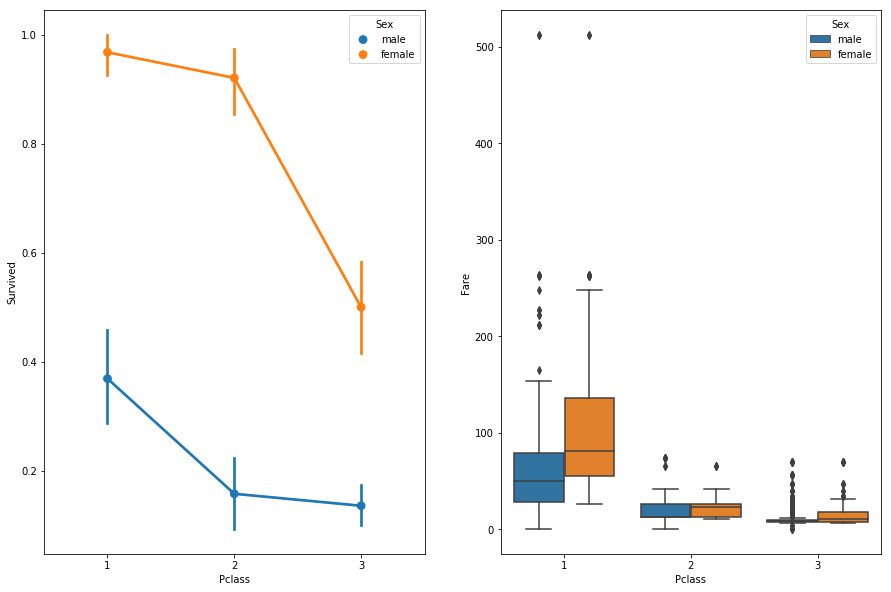

In [7]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df_train, ax = ax1)
sns.boxplot(x='Pclass', y = 'Fare',hue = 'Sex', data = df_all, ax = ax2)
plt.close(2)

### SIbSp & Parch
SibSp & Parch 높아지면 3등석에 많이 탑승한다. 그리고 SibSp & Parch 가 0이면 남성의 비율이 높다.

In [8]:
display(pd.crosstab([df_all.SibSp,df_all.Sex],df_all.Pclass).style.background_gradient(cmap='summer_r'))
display(pd.crosstab([df_all.Parch,df_all.Sex],df_all.Pclass).style.background_gradient(cmap='summer_r'))

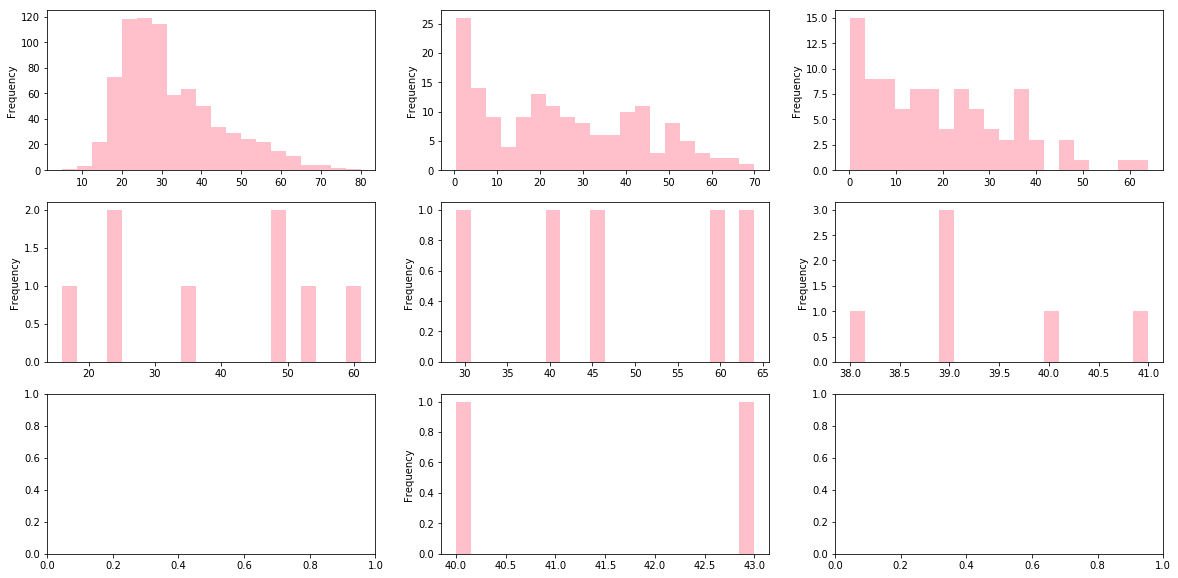

In [9]:
#parch 별로 나이 
f,ax=plt.subplots(3,3,figsize=(20,10))
df_all[df_all['Parch']==0].Age.plot.hist(ax=ax[0,0],bins=20,color='pink')
df_all[df_all['Parch']==1].Age.plot.hist(ax=ax[0,1],bins=20,color='pink')
df_all[df_all['Parch']==2].Age.plot.hist(ax=ax[0,2],bins=20,color='pink')
df_all[df_all['Parch']==3].Age.plot.hist(ax=ax[1,0],bins=20,color='pink')
df_all[df_all['Parch']==4].Age.plot.hist(ax=ax[1,1],bins=20,color='pink')
df_all[df_all['Parch']==5].Age.plot.hist(ax=ax[1,2],bins=20,color='pink')
df_all[df_all['Parch']==6].Age.plot.hist(ax=ax[2,1],bins=20,color='pink')
plt.show()
# Parch 0인 사람들 최소 10대 후반 사람들 성인
# parch 1~2인 사람들 전 연령대 아이와 결혼한 사람들 
# parch 3 부모가 3명?
# parch 4 이상은 부모가 2인 이상은 없을 테니 다 30대 이상

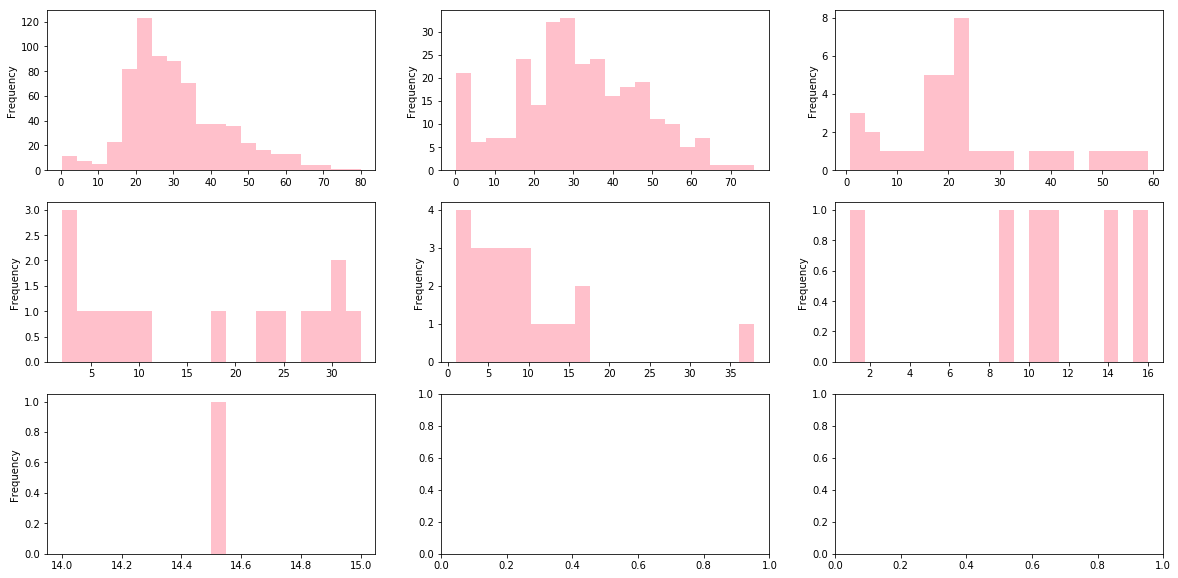

In [10]:
#SibSP 별로 나이 
f,ax=plt.subplots(3,3,figsize=(20,10))
df_all[df_all['SibSp']==0].Age.plot.hist(ax=ax[0,0],bins=20,color='pink')
df_all[df_all['SibSp']==1].Age.plot.hist(ax=ax[0,1],bins=20,color='pink')
df_all[df_all['SibSp']==2].Age.plot.hist(ax=ax[0,2],bins=20,color='pink')
df_all[df_all['SibSp']==3].Age.plot.hist(ax=ax[1,0],bins=20,color='pink')
df_all[df_all['SibSp']==4].Age.plot.hist(ax=ax[1,1],bins=20,color='pink')
df_all[df_all['SibSp']==5].Age.plot.hist(ax=ax[1,2],bins=20,color='pink')
df_all[df_all['SibSp']==8].Age.plot.hist(ax=ax[2,0],bins=20,color='pink')
plt.show()
# 0 ~ 1 은 형제 자매가 없거나 아니면 배우자가 없는 사람들 혹은 약혼산 사람들이나 형제 자매가 1명있는 사람들로 전연령대
# 2~4 는 배우자와 자매형제들인 사람도 있으나 대가족 여행 하는 사람들일 가능성이ㅏ 조금 더 크다
# 5~8은 배우자 이외에 다둥이 자녀들일 가능성이 많고 그러면 대가족 여행이니 어린 아이들

### Embarked
S에 3등급 사람 많이 탔기때문에 생존률 낮다. 
<br> Q에는 1,2 등석 사랍들은 거의 탑승 안 하고 3등석 사람이 다 탑승했기 때문에 생존률이 낮다.
<br> C탑승에는 3등석 사람들의 비율이 상대적으로 낮고 1등석 사람이 많이 탔기 때문에 가장 높은 생존률을 보인다.

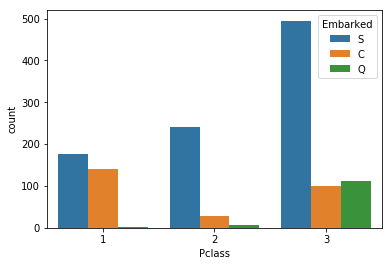

In [11]:
sns.countplot(x = "Pclass", hue = "Embarked", data = df_all)

### Fare
생존자와 사망자의 생존자 수의 분포를 비교해보면 영유아(age < 약5)아이들의 생존률이 높았다.

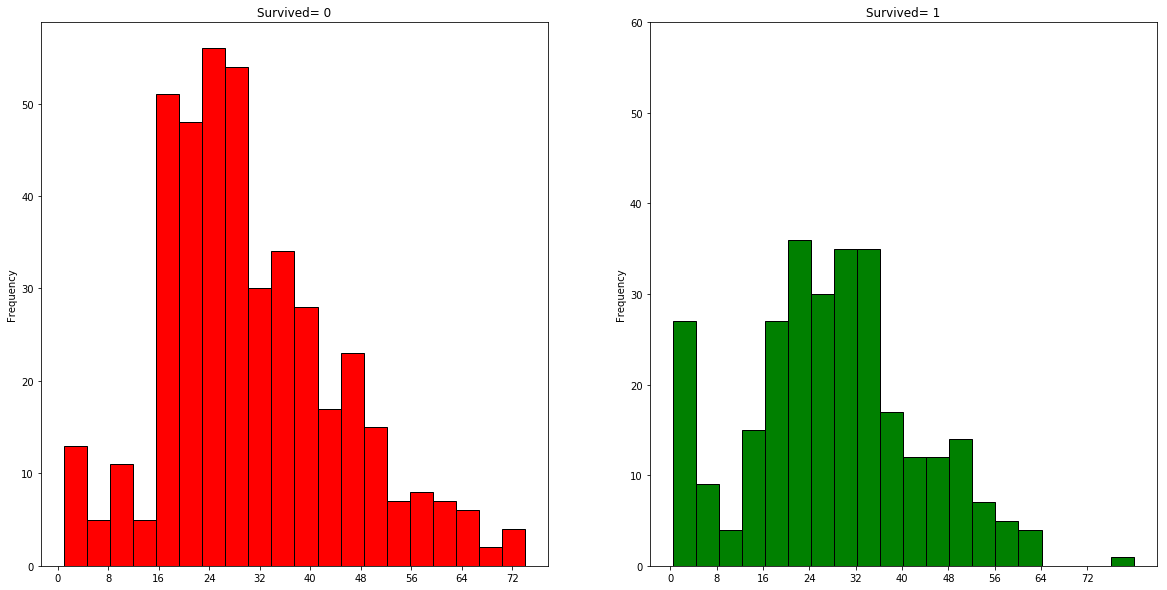

In [12]:
#나이별 생존한 사람 수 
f,ax=plt.subplots(1,2,figsize=(20,10))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,80,8))
ax[0].set_xticks(x1)
#plt.yticks(list(range(0,300,30)))
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,80,8))
ax[1].set_xticks(x2)
ax[1].set_ylim([0,60])
plt.show()

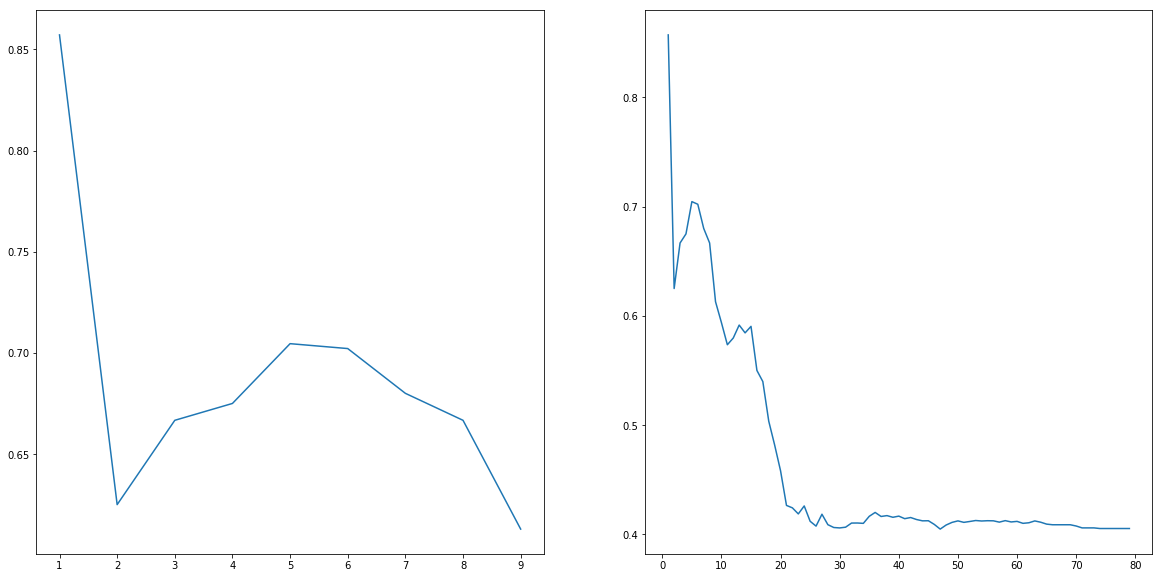

In [13]:
# 6살 까지의 생존률이 높다 나이가 높아짐에 따라 생존률이 낮아진다.
f,ax=plt.subplots(1,2,figsize=(20,10))

plt.subplot(1,2,1)
a = []
for i in range(0, int(max(df_all.Age))):
    a.append(df_all.loc[df_all.Age <= i].Survived.mean())
plt.plot(a[:10])

plt.subplot(1,2,2)
a = []
for i in range(0, int(max(df_all.Age))):
    a.append(df_all.loc[df_all.Age <= i].Survived.mean())
plt.plot(a)

(0, 80)

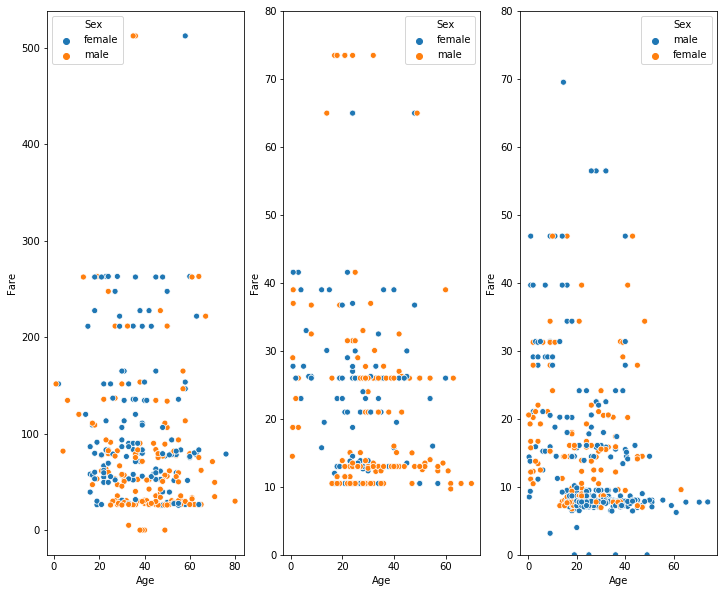

In [14]:
f,ax=plt.subplots(1,3,figsize=(12,10))
sns.scatterplot('Age', 'Fare',hue = 'Sex', data =df_all[df_all['Pclass']==1], ax = ax[0])
sns.scatterplot('Age', 'Fare',hue = 'Sex', data =df_all[df_all['Pclass']==2], ax = ax[1])
sns.scatterplot('Age', 'Fare',hue = 'Sex', data =df_all[df_all['Pclass']==3], ax = ax[2])
ax[1].set_ylim(0,80)
ax[2].set_ylim(0,80)

### Cabin

결측치도 너무 많고 딱히 얻을 정보가 없다

In [15]:
#cabin 앞자리 끊기
# df_all['Cabin2']=df_all.Cabin.apply(lambda x : len(x))
#test['Cabin2']=test.Cabin.apply(lambda x : len(x))
# df_all["cabin2"] = df_all['Cabin'].astype(str).str[0]
# df_train["cabin2"] = df_train['Cabin'].astype(str).str[0]

#sns.barplot('cabin', 'Survived', data = df_train)
# sns.barplot('Cabin2', 'Survived', data = df_all)

# pd.crosstab([df_all.Cabin2,df_all.Sex],[df_all.Pclass,df_all.Survived]).style.background_gradient()
# pd.crosstab([df_all.Cabin2,df_all.Sex],[df_all.Pclass,df_all.Survived]).style.background_gradient()

# display(pd.crosstab([df_train.cabin2,df_train.Survived],[df_train.Pclass,df_train.Sex]).style.background_gradient())
# pd.crosstab(df_all.cabin2,df_all.Pclass).style.background_gradient()

## Feature Engineering & NA_Filling

### 1) NA_Filling

**Embarked & Fare**

In [16]:
df_all[pd.isnull(df_all.Fare) | pd.isnull(df_all.Embarked)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [17]:
#결측치가 1등급이고 여자이니 1등급에서 성별로 가격이 차이가 났고 이상치가 있었으니 median 값으로 Fare 대체
df_all.Fare.fillna(df_all.groupby(['Pclass','Sex'])['Fare'].transform('median'), inplace = True)
# Pclass 별로 가장 많은 Embarked의 값으로 대체
df_all.Embarked.fillna(df_all.groupby('Pclass')['Embarked'].transform(lambda x:x.value_counts().index[0]), inplace = True)

**Age**
<br>Age 의 경우  https://medium.com/i-like-big-data-and-i-cannot-lie/how-i-scored-in-the-top-9-of-kaggles-titanic-machine-learning-challenge-243b5f45c8e9 의 글을 바탕으로 Age 결측치 처리하겠다.

In [18]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [19]:
df_all['title']=df_all.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())

newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

df_all['title']=df_all.title.map(newtitles)

pd.DataFrame(df_all.groupby('title').title.count()).T

title,Master,Miss,Mr,Mrs,Officer,Royalty
title,61,262,757,200,23,6


In [20]:
# age 예측 이용할 열 Fare, Pclass, Parch, SibSp
#sns.heatmap(df_all.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})

In [21]:
#title label encoding
from sklearn.preprocessing import LabelEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(df_all.title)
df_all.title = encoder.transform(df_all.title)

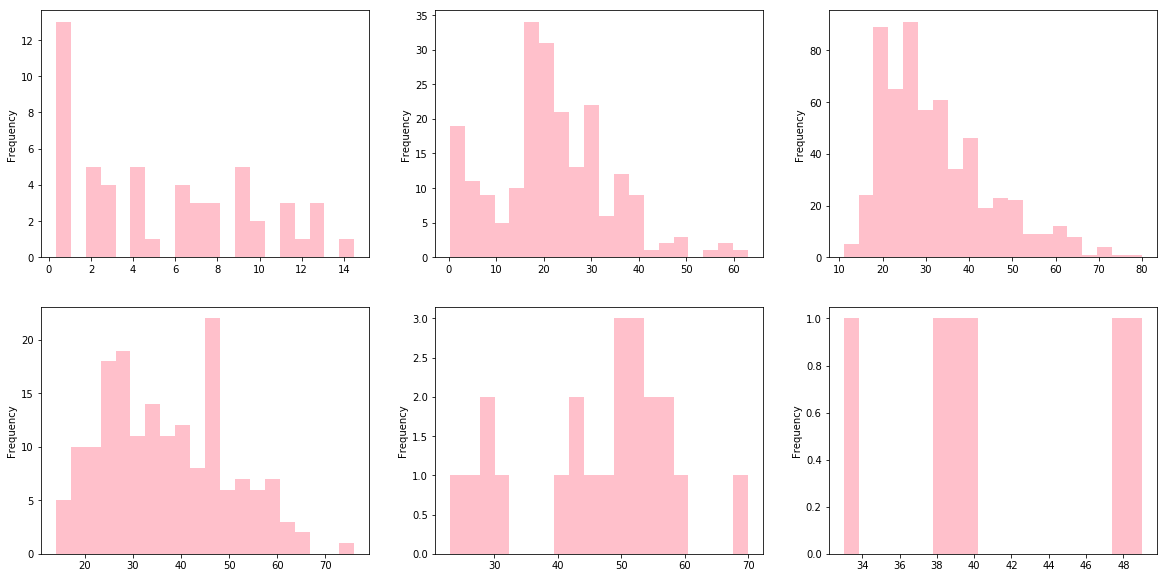

In [22]:
f,ax=plt.subplots(2,3,figsize=(20,10))
df_all[df_all['title']==0].Age.plot.hist(ax=ax[0,0],bins=20,color='pink')
df_all[df_all['title']==1].Age.plot.hist(ax=ax[0,1],bins=20,color='pink')
df_all[df_all['title']==2].Age.plot.hist(ax=ax[0,2],bins=20,color='pink')
df_all[df_all['title']==3].Age.plot.hist(ax=ax[1,0],bins=20,color='pink')
df_all[df_all['title']==4].Age.plot.hist(ax=ax[1,1],bins=20,color='pink')
df_all[df_all['title']==5].Age.plot.hist(ax=ax[1,2],bins=20,color='pink')
plt.show()

In [23]:
df_all.Age.fillna(df_all.groupby(['Pclass','title','Parch', 'SibSp']).Age.transform('median'), inplace = True) #최대로 정보 활용
df_all.Age.fillna(df_all.groupby(['title']).Age.transform('median'), inplace = True) #나머지는 title만 이용

## 2)feature enginnering

In [24]:
df_all.isnull().sum(), df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
title          1309 non-null int32
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 102.3+ KB


(Age               0
 Cabin          1014
 Embarked          0
 Fare              0
 Name              0
 Parch             0
 PassengerId       0
 Pclass            0
 Sex               0
 SibSp             0
 Survived        418
 Ticket            0
 title             0
 dtype: int64, None)

### Make New Features
몇개의 Feature를 만들고 그에 따라 시각화를 해보겠다.

In [25]:
df_all['Family_Size']=0
df_all['Family_Size']= df_all['Parch']+df_all['SibSp'] # family size
df_all['Alone']=0
df_all.loc[df_all.Family_Size==0,'Alone']=1 #Alone
df_all['Kinder']=0
df_all.loc[df_all.Age <= 6,'Kinder']=1 #Alon2

# Age 의 경우는 1씩 증가한다 즉 단위가 1단위라고 생각 할 수 있지만 
# Fare 의 경우는 단위가 1이라도 분포를 보면 단위가 확 커질때가 있다.(PClass2,3 에서 Pclass 1로 갈때)
# 따라서 Age 는 동일한 단위의 길이(?)로 나누지만 Fatebin은 qcut을 사용한다.
df_all['FareBin'] = pd.qcut(df_all['Fare'], 5)
df_all['AgeBin'] = pd.cut(df_all['Age'].astype(int), 5)


* 이 증가함에따라 생존률으 증가한다.(Pclass 상승효과)
* 학생들과 아이들의 생존률이 높았고 20~30대의 생존률과 특히 노인(<60)들의 생존률이 낮았다.
* Family_Size : 혼자 탑승한경우 생존률이 많이 낮았고 1~3애서의 생존률이 높았다. 그리고 4이상 생존률도 많이 낮았다.

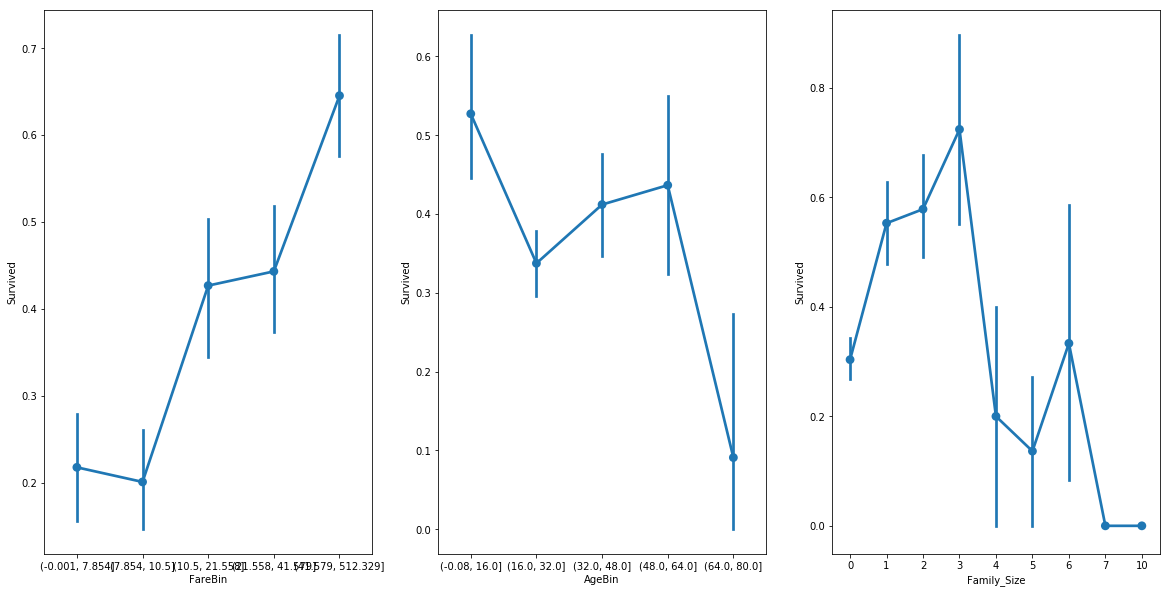

In [26]:
#https://stackoverflow.com/questions/41570747/unwanted-blank-subplots-in-matplotlib why supposed to use plt close in factorplot
f,ax=plt.subplots(1,3,figsize=(20,10))
sns.factorplot('FareBin', 'Survived', data = df_all, ax=ax[0])
sns.factorplot('AgeBin', 'Survived', data = df_all, ax=ax[1])
sns.factorplot('Family_Size', 'Survived', data = df_all, ax=ax[2])
plt.close(2)
plt.close(3)
plt.close(4)

* 16세 미만에서도 특히 영유아 승객들의 생존률이 높았다
* Alone 인 경우 다 혼자가 아닐때보다 생존률이 낮았읃나 Pclass3 Female의 경우 예외였다.
<br>->Pclass 3의 Femaled의 경우 Pclass1,2에 비해 Family Size 가 큰 경우가 많았고 Family Size가 크면 거의 다 사망하였고
<br> 혼자 탑승한 경우보다 Family와 함께 탑승한 사람이 많아서 오히려 혼자 탑승한 사람이 사망률이 낮았다.
<br> Pclass 3의 경우 Male 의 경우는 혼자 탑승한 사람의 비율이 Family SIze가 큰 경우보다 훨씬 많았고 혼자 탑승한 경우 낮은 생존률을 보였기에 
<br> Pclass 3 Famale 과 차이를 보였다.


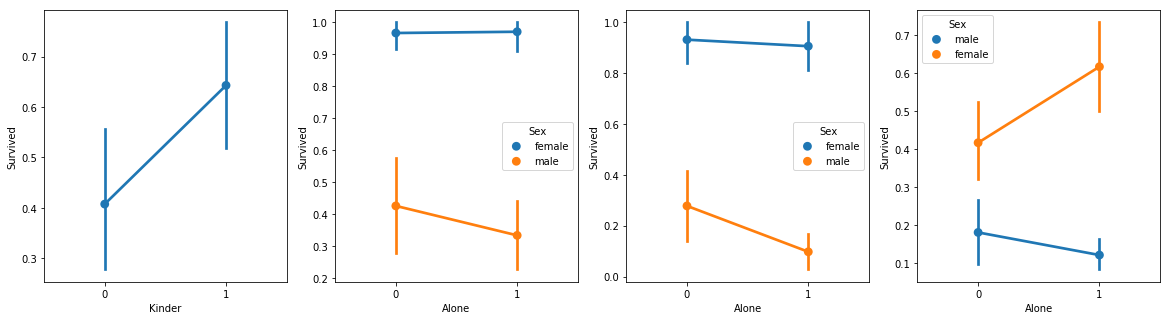

In [27]:
f,ax=plt.subplots(1,4,figsize=(20,5))
sns.factorplot(x = 'Kinder',y= 'Survived', data = df_all.loc[df_all.Age <= 16], ax =ax[0])
for i in range(1,4): sns.factorplot(x = 'Alone',y= 'Survived',hue = 'Sex', data = df_all.loc[df_all.Pclass == i], ax =ax[i])
for i in range(2,6): plt.close(i)

In [28]:
# Pclass3 Female 생존률 올라간 근거 
# pd.crosstab([df_all.Family_Size, df_all.Survived],[df_all.Sex,df_all.Pclass]).style.background_gradient(cmap='summer_r')

## Drop Features & Encoding

In [29]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
title          1309 non-null int32
Family_Size    1309 non-null int64
Alone          1309 non-null int64
Kinder         1309 non-null int64
FareBin        1309 non-null category
AgeBin         1309 non-null category
dtypes: category(2), float64(3), int32(1), int64(7), object(5)
memory usage: 135.7+ KB


In [30]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,title,Family_Size,Alone,Kinder,FareBin,AgeBin
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,1,0,0,"(-0.001, 7.854]","(16.0, 32.0]"
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,3,1,0,0,"(41.579, 512.329]","(32.0, 48.0]"
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,0,1,0,"(7.854, 10.5]","(16.0, 32.0]"
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,3,1,0,0,"(41.579, 512.329]","(32.0, 48.0]"
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2,0,1,0,"(7.854, 10.5]","(32.0, 48.0]"


In [31]:
#Label Encoder
df_all2 = df_all #시험중이라 일단 이거 나중에 삭제할것
label = LabelEncoder()
df_all['Sex_Code'] = label.fit_transform(df_all['Sex'])
df_all['AgeBin_Code'] = label.fit_transform(df_all['AgeBin'])
df_all['FareBin_Code'] = label.fit_transform(df_all['FareBin'])
df_all['Embarked_Code'] = label.fit_transform(df_all['Embarked']) #어떻게 할지
df_all['Title_Code'] = label.fit_transform(df_all['title']) #

In [32]:
# df_all['Family_name'] = df_all.Name.apply(lambda x: x.split(',')[0])
# df_all['Family_freq'] = df_all.groupby('Family_name')['Family_name'].transform('count')

In [33]:
# df_all[df_all.Family_freq >= 2].sort_values(by = ['Family_freq','Family_name'], ascending=False)[['Age','Sex','Pclass','Survived','Family_name','Family_freq']]

In [34]:
df_all.drop(["Age", 'Name','Cabin', 'Fare', 'Parch','SibSp','Ticket','Sex','FareBin','AgeBin','Alone'], axis = 1, inplace = True)
#df_all.drop('Embarked', axis = 1, inplace = True)
#df_all.title = df_all.title.astype(object)

In [35]:
df_all = pd.get_dummies(df_all)
# from sklearn.preprocessing import OneHotEncoder
# title_one = OneHotEncoder()
# X = title_one.fit_transform(df_all.title.values.reshape(-1,1)).toarray()
# dfOneHot = pd.DataFrame(X, columns = ["Color_"+str(int(i)) for i in range(X.shape[1])])

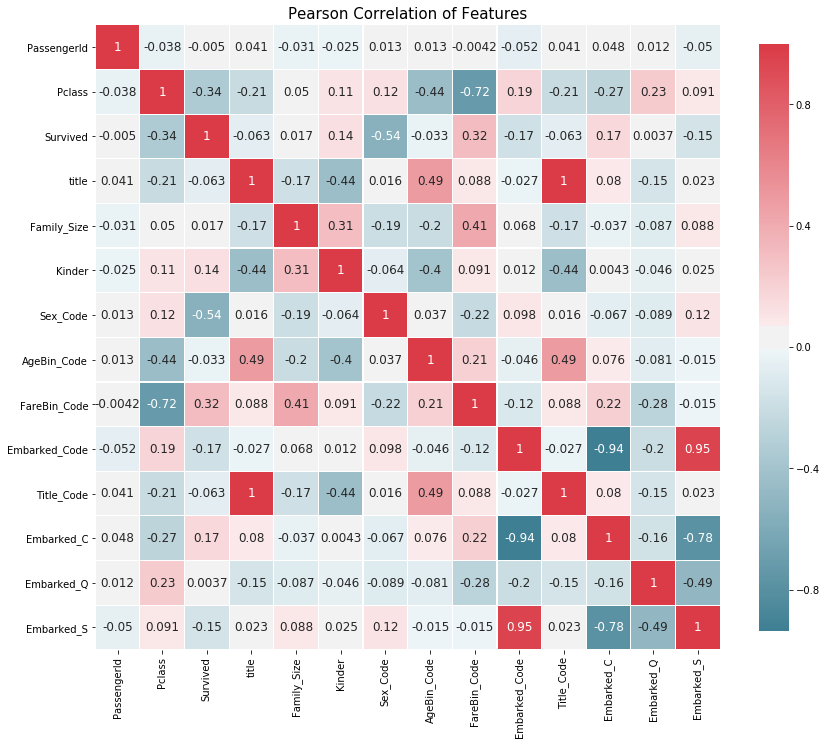

In [36]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df_all)

In [37]:
#재 정의
df_test = df_all[df_all.Survived.isnull()]
df_train =  df_all.dropna(subset = ['Survived'])

In [38]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [39]:
train_id = df_train.PassengerId
df_train.drop('PassengerId', axis = 1, inplace = True)
test_id = df_test.PassengerId
df_test.drop('PassengerId', axis = 1, inplace = True)

In [40]:
train,test=train_test_split(df_train,test_size=0.3,random_state=0,stratify=df_train['Survived'])
train_X=train.drop('Survived', axis = 1)
train_Y=train['Survived']
test_X=test.drop('Survived', axis = 1)
test_Y=test['Survived']
X=df_train.drop('Survived', axis = 1)
Y=df_train['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [41]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [42]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.7910447761194029


### Decision Tree

In [43]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8134328358208955


### K-Nearest Neighbours(KNN)

In [44]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8246268656716418


Now the accuracy for the KNN model changes as we change the values for **n_neighbours** attribute. The default value is **5**. Lets check the accuracies over various values of n_neighbours.

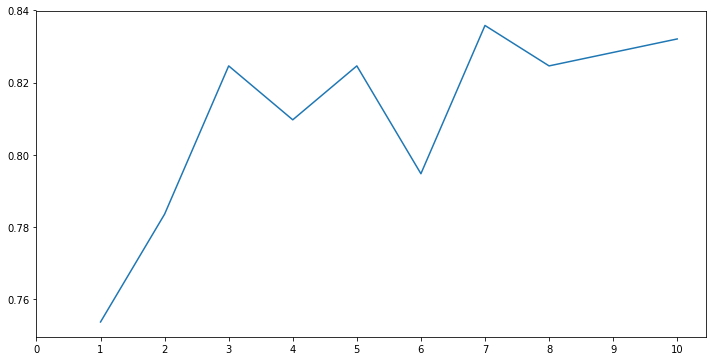

Accuracies for different values of n are: [0.75373134 0.78358209 0.82462687 0.80970149 0.82462687 0.79477612
 0.8358209  0.82462687 0.82835821 0.83208955] with the max value as  0.835820895522388


In [45]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Logistic Regression

In [46]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.7947761194029851


### Gaussian Naive Bayes

In [47]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8171641791044776


### Random Forests

In [48]:
model=RandomForestClassifier(n_estimators=100,max_depth=4)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8283582089552238


In [49]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784494,0.037956
Radial Svm,0.830537,0.037705
Logistic Regression,0.799101,0.026801
KNN,0.808165,0.038150
Decision Tree,0.803608,0.033314
Naive Bayes,0.780087,0.031273
Random Forest,0.817054,0.044695


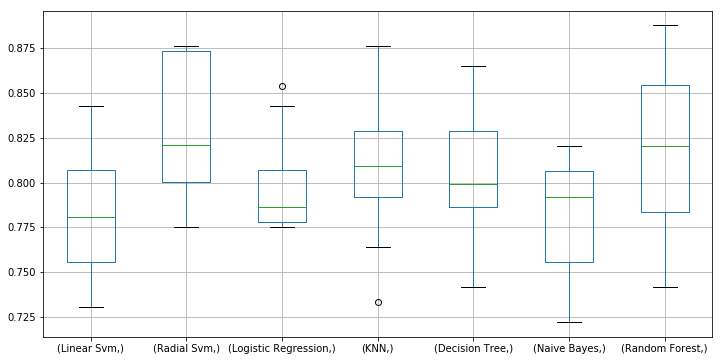

In [50]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

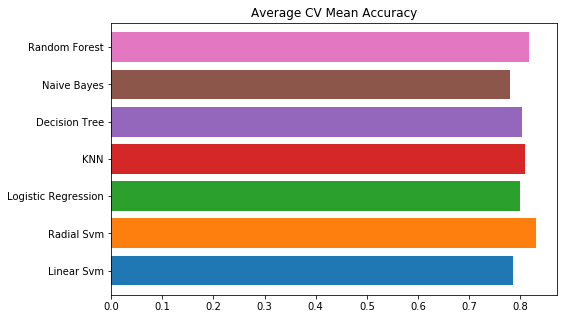

In [51]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 때때로 imblance(불균형한) 데이터 때문에 잘못 해석 될 수 있다. Confusion matrix를 이용해서 모델이 무었이 잘못 됬는지 어떤 class를 잘못 예측했는지에 대한 종합적인 결과를 얻을 수 있다.

## Confusion Matrix

이것은 classifier에 의해 분류된 올바른 분류와 잘못된 분류의 수를 보여준다.

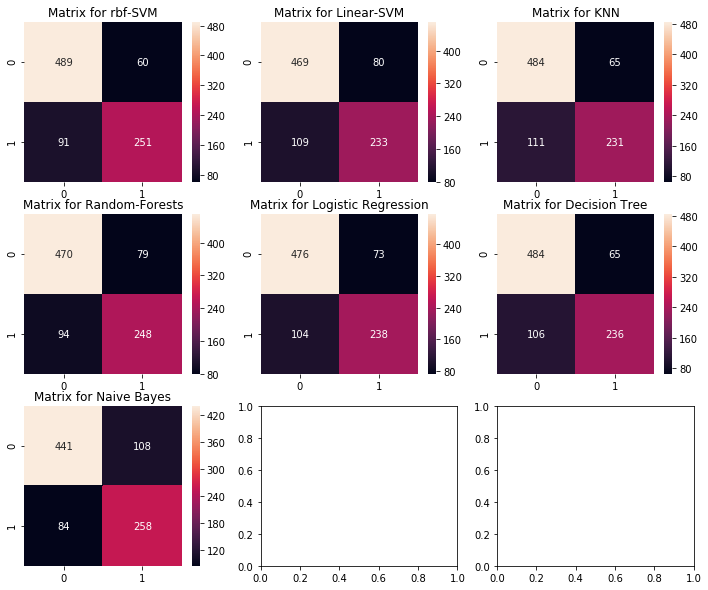

In [52]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Confusion matrix 해석
왼쪽 대각행렬은 각각의 class에 대해 올바르게 예측된 수 이고 오른쪽 대각 행렬은 잘못 예측된 class의 수 이다. 첫 번째 rbf-SVMN의 plot살펴 보자.

1)올바른 예측의 수는 492(for dead) + 251(for survived) 로 앞서 실행한 평균적인 CV accuracy는 83.0%를 기록하였다.

2)Errors --> 57명의 사망자가 생존자로 95명의 생존자가 사망자로 잘못 분류 됬다. 따라서 모델은 생존자를 사망자로 더 잘못 분류 됬다.

모든 matrix을 살펴보면 rbf-SVM의 사망자의 예측률이 가장 높아 보였으나 NaiveBayes의 사망자 예측률이 더 높았다.

### Hyper-Parameters Tuning

머신러닝 모델은 블랙박스와 같다. 이 블랙박스 안에는 초기의 parameter가 있으나 우리는 더 좋은 모델을 얻기위해 parameter를 조정해야 한다. SVM의 C와 gamma 처럼 다른 classifier의 다른 모수들은 hyper-parameter라고 불린다. 이 hyper-parameter를 알고리즘의 learning rater를 조정하고 더 나은 모델을 얻기 위해 조정할 수 있다. 이것이 Hyper-parameter Tuning이다.

여기서는 2개의 가장 좋은 성능을 보인 SVM과 RandomForests를 hyper-parameter tuning 할것이다. + logistic도 해줬다.

#### SVM

In [53]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.7,0.8,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True, n_jobs = 4)
#gd.fit(X,Y)
gd.fit(df_train.drop('Survived',axis = 1), df_train['Survived'])
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:    3.6s


0.8316498316498316
SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:    7.4s finished


#### Logistic Regression

In [54]:
c_params = [0.1,0.2,0.3,0.4,0.5,  5.0, 7.0, 10.0, 15.0, 20.0, 100.0]
params = {
    "solver" : ['liblinear'],
    "penalty" : ["l2"],
    "C" : c_params
    }
gd=GridSearchCV(estimator=LogisticRegression(),param_grid=params,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 11 candidates, totalling 33 fits
0.7968574635241302
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.1s finished


#### Random Forests

In [55]:
n_estimators=range(50,500,50)

hyper={'n_estimators':n_estimators,
       'max_depth': range(2,8),
       'min_samples_leaf' : range(2,6)
      }
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True,
               cv=5, scoring='accuracy',n_jobs=4)
#gd.fit(X,Y)
gd.fit(df_train.drop('Survived',axis = 1), df_train['Survived'])
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   27.3s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:  1.0min


0.8361391694725028
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed:  1.3min finished


The best score for Rbf-Svm is **83.5% with kernel = rbf, C=0.5 and gamma=0.1**.
<br>For Logistic Regression **82.3% solver = 'linear', penalty = 'l2', C = 5 **. 
<br>For RandomForest, score is abt **83.6% with n_estimators=50, max=depth = 5, min_samp_leaf = 5(default)**.

#### Ensembling
앙상블은 모델의 정확도와 성능을 향승시키기 위한 좋은 방법이다. 쉽게 말해서 다양한 간단한 모델의 조합을 사용해서 새로운 강력한 모델을 만드는 것이다.

간단한 예시를 들면 우리가 핸드폰을 사기를 원하고 많은 사람들에게 다양한 조건에 관해서 물어봤다고 하자. 모든 조건에 관해 분석한 다음 하나의 상품에 대해 더 강력한 판단을 만들 수 있다. 이 방법이 모델의 안정도를 향상시킬 수 있는 앙상블이다. 앙상블은 다음과 같은 방법으로 행해질 수 있다 :

1)Voting Classifier

2)Bagging

3)Boosting

### Voting Classifier

다른 종류의 간단한 머신러닝모델으로 예측한 것을 조합하는 방법으로 이것은 모든 기본 모델의 예측에 기반하여 평균적인 예측을 제공해 준다.
기본모델은 모두 다른 종류이다.

In [57]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=50,random_state=0,max_depth=5, min_samples_leaf=2)),
                                              ('LR',LogisticRegression(C=5, solver = 'liblinear', penalty = 'l2')),
                                              ('NB',GaussianNB()),
                                             ], 
                       voting='soft').fit(df_train.drop('Survived',axis=1),df_train.Survived)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
VC_cross=cross_val_score(ensemble_lin_rbf,X,Y,cv=10,scoring='accuracy')
print('The cross validated score is',VC_cross.mean())

The accuracy for ensembled model is: 0.8432835820895522
The cross validated score is 0.8182107592781751


#### Bagging

Bagging(배깅)은 일반적인 앙상블 방법이다. 유사한 classifier들을 데이터셋의 한 부분에 적용하고 모든 예측의 평균을 얻는 방법이다. 평균을 내는 덕분에 분산을 감소시킨다. Voting classifier와는 다르게 Bagging은 유사한 classifier를 사용한다.ar classifiers.

In [60]:
from sklearn.ensemble import BaggingClassifier
model1=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model1.fit(train_X,train_Y)
prediction=model1.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
Bag_result=cross_val_score(model1,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',Bag_result.mean())

The accuracy for bagged KNN is: 0.8171641791044776
The cross validated score for bagged KNN is: 0.8069867211440245


#### Bagged KNN

배깅은 높은 분산을 가진 모델을 사용할때 가장 잘 작동한다. 이것의 예시로는 Decision Tree 또는 Random Forests가 있다. 여기서는 작은 N_neighborus를 가진 KNN을 사용할 것이다.


In [62]:
model2=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model2.fit(train_X,train_Y)
prediction=model2.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
BA_K_result=cross_val_score(model2,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',BA_K_result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8103453070026104


#### Boosting

부스팅은 연속적인 Classifier의 학습을 사용하는 앙상블 기법이다. 이것은 약한 모델은 단계적으로 강화시키는 것으로 부스팅은 다음곽 ㅏㅌ이 작동한다.:

먼저 전체 데이터셋에 학습된다. 이제 모델은 잘못 예측된 모델의 instance를 얻고 다음의 반복과정에서 the learner(모델)은 잘못 예측된 instance에 대해 집중적으로 학습하거나 아니면 그것에 대해 더 가중치를 준다. 그러므로 잘못 예측된 instance를 바르게 예측하도록 시도하는 것이다. 이제 반복되는 과정이 계속되면서 classifiers는 정확도의 한계에 다다를 때 까지 classifier가 모델에 더해진다.

**AdaBoost(Adaptive Boosting)**    
The weak learner or estimator in this case is a Decsion Tree. But we can change the dafault base_estimator to any algorithm of our choice.

In [63]:
from sklearn.ensemble import AdaBoostClassifier
model3=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
ada_result=cross_val_score(model3,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',ada_result.mean())

The cross validated score for AdaBoost is: 0.8305331403926909


**Stochastic Gradient Boosting**   
Here too the weak learner is a Decision Tree.

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
model4=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
sgd_result=cross_val_score(model4,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',sgd_result.mean())

The cross validated score for Gradient Boosting is: 0.8148774259448418


**XGBoost**

In [66]:
# import xgboost as xg
# xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
# result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
# print('The cross validated score for XGBoost is:',result.mean())

Hyper-Parameter Tuning for AdaBoost

In [65]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate, n_jobs = -1}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  4.5min finished


0.8282828282828283
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


The maximum accuracy we can get with AdaBoost is **83.16%** with **n_estimators=200** and **learning_rate=0.05**

### Confusion Matrix for the Best Model

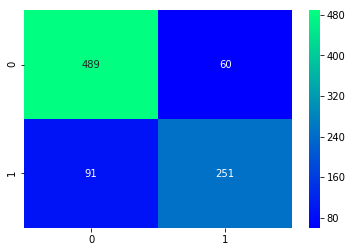

In [67]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### Feature Importance

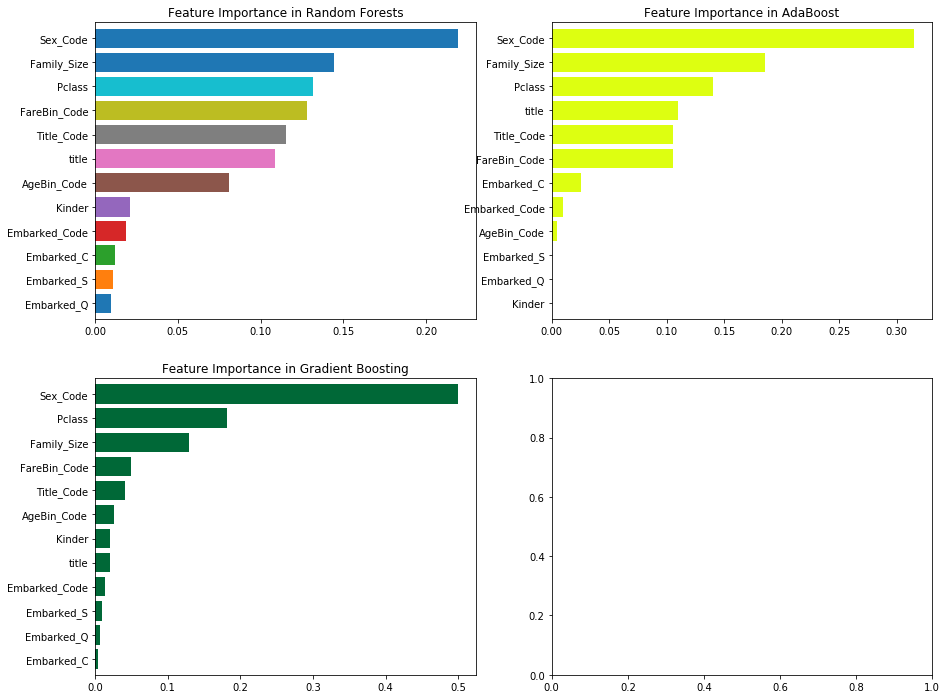

In [69]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
# model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
# model.fit(X,Y)
# pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
# ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

RandomForests 나 AdaBoost와 같은 Classifier의 feature importance를 살펴본다.

**Observations:**  
1)중요한 feature로 나타난 것은 Sex_code, Pclass, Family_size가 있다.

2)Pclass 과 Fare_cat는 승객의 지위를 나타내주고 Family_Size는 Alone,Parch and SibSp를 나타낸다.

머신라닝에 관한 몇가지의 insight를 얻기를 바랍니다.   
다른 좋은 notebook은 다음과 같습니다:  
1) For R:Divide and Conquer by Oscar Takeshita

2) For Python:Pytanic by Heads and Tails

3) For Python:Introduction to Ensembling/Stacking by Anisotropic

이 글은 https://www.kaggle.com/ash316/eda-to-prediction-dietanic#Cross-Validation 를 바탕으로 쓰여졌습니다.  
도움이 되셨다면 링크로 가셔서 upvote 한 번 눌러주세요. 
kernel wirter에게 다시 한 번 감사의 말씀을 전합니다